# ECSE626- Computational Photography Portfolio
### By Mohamed Debbagh
#### April 11 2023

_*This is the descriptive report that accompanies the original computationally generated images. For full scale resolution of the images with detail, please see the original images that came in the zip folder along with this document_

In [1]:
import matplotlib.pyplot as plt
import warnings
import logging
%matplotlib inline
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)
warnings.simplefilter('ignore')
import cv2

def load_image(img_path, imshow=True):
    
    img=cv2.imread(img_path)
    
    if imshow:
        plt.figure()
        plt.imshow(img[:,:,::-1])
    
    return img



## Image 1 & Image 2: Image Compositing, Matting, and Alpha Blending 

## Descrption
The technique applied to the following 2 images is compsiting via matting and alpha blending. The idea of the method is  apply new backgrounds to the human subjects of the original input images. This effect is similar to the technique applied in films to seperate foreground and backgkround in order to add special effects to a scene or change the background entirely. While traditional methods rely on green screens and rhotoscoping to manually produce alpha mattes, deep learning methods were applied here to generate the alpha mattes from the original images. The specif model used to produce these alpha mattes is the U2-Net[1]. Further alpha blending is performed to apply the seperated foreground to the new background


### Image 1
**Camera:** Samsung SM-F711W, 12MP F1.8 26mm 1/40s

This image was taken during a ski trip. A space background was applied to the subject of the image, as the costume seemed fitting for a space scene. The alpha mattes generated did a decent job, but failed to capture the thin structure of one of the ski poles. This may be due to the pole being white, similar to the snow in the background, nevertheless, the final output was quite convincing. reflection of the glasses still capture the orginal background scene and requires further post processing.


### Image 2
**Camera:** Samsung SM-F711W, 12MP F1.8 26mm 1/30s

The silly image was taken at a department store. A fairly bleak background for such a cool pair of glasses. The new background applied was of a cyberpubk city scape. Again in this scene the reflection of the glasses captures the orginal background scene and requires further post processing.

### References

[1] Qin, X., Zhang, Z., Huang, C., Dehghan, M., Zaiane, O. R., & Jagersand, M. (2020). U2-Net: Going deeper with nested U-structure for salient object detection. Pattern recognition, 106, 107404. 


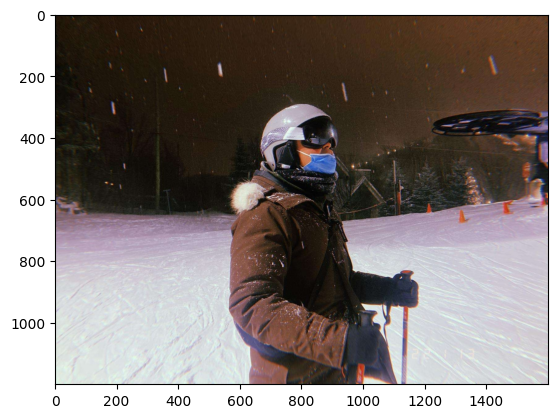

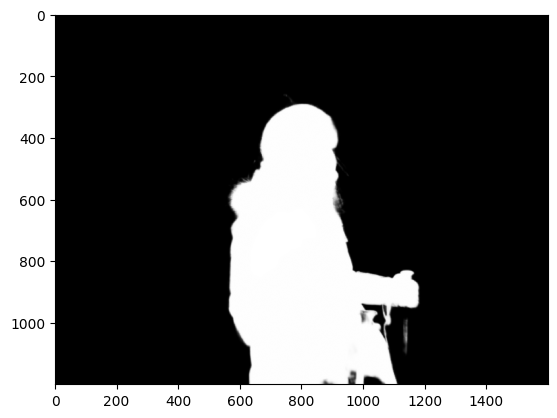

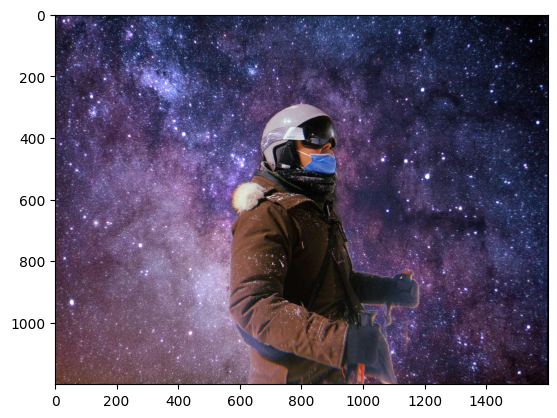

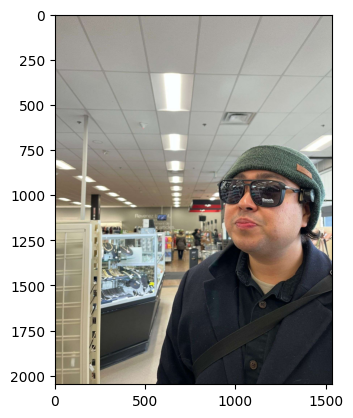

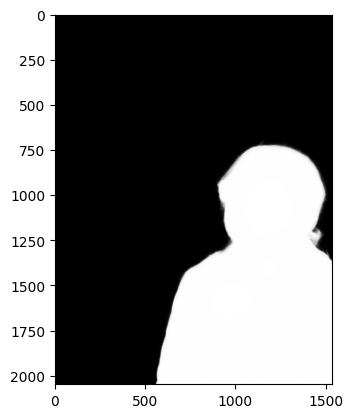

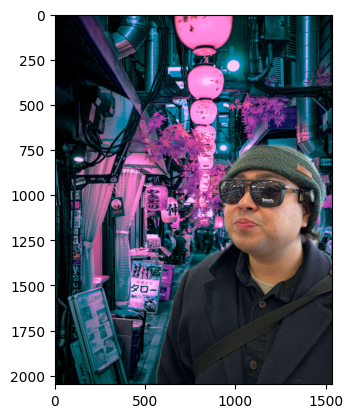

In [2]:
# Read the images

def alpha_blend(fg_img="img1_og.png", bg_img="img1_bg.jpg", alpha_img ="img1_alphamatte.png",  out='out_img.png', imshow=False):

    foreground = cv2.imread(fg_img)
    background = cv2.imread(bg_img)
    alpha = cv2.imread(alpha_img)
    
    if imshow:
        plt.figure()
        plt.imshow(foreground[:,:,::-1])

    # Convert uint8 to float
    foreground = foreground.astype(float)
    background = background.astype(float)

    background = cv2.resize(background, (foreground.shape[1],foreground.shape[0]), interpolation=cv2.INTER_CUBIC)
    
    # Normalize the alpha mask to keep intensity between 0 and 1
    alpha = alpha.astype(float)/255

    # Multiply the foreground with the alpha matte
    foreground = cv2.multiply(alpha, foreground)

    # Multiply the background with ( 1 - alpha )
    background = cv2.multiply(1.0 - alpha, background)

    # Add the masked foreground and background.
    out_img = cv2.add(foreground, background)
    
    cv2.imwrite(out, out_img)
    
    if imshow:
        plt.figure()
        plt.imshow(alpha[:,:,::-1])

        # plt.figure()
        # plt.imshow(foreground.astype(int)[:,:,::-1])

        plt.figure()
        plt.imshow(out_img.astype(int)[:,:,::-1])
    
        
    return out_img
 
# Display image


out_img1 = alpha_blend(fg_img="img1_og.png", 
                      bg_img="img1_bg.jpg", 
                      alpha_img ="img1_alphamatte.png",  
                      out='img1_out.png', 
                      imshow=True)

out_img2 = alpha_blend(fg_img="img2_og.png", 
                      bg_img="img2_bg.jpg", 
                      alpha_img ="img2_alphamatte.png",  
                      out='img2_out.png', 
                      imshow=True)




## Image 3 & Image 4: Neural Style Transfer

## Descrption
The technique applied to the following 2 images is Neural Style Transfer. The idea of the method is  apply new an abstract artistic styles captured by a reference image onto the structural components of the original image. This can lead to very unique images that can capture the art styles of any particular artist such as Van Gogh. Neural style transfer is performed by exploiting the loss functions of a convolutional neural network such as VGGnet. The particular method applied comes from the original  paper of neural style transfer by Gatys et al.[2].

### Image 3
**Camera:** Samsung SM-F711W, 12MP F1.8 26mm 1/1173s

A cannabis plant in the flowering stage of growth. The buds are nearing the late stages with the psychoactive components of plant frosting over. Since these plant are commonly known to produce psycoactive effects, an abstract style is applied to the original image to embody the essence of psychedelic the experience onto the plant directly. 


### Image 4
**Camera:** Samsung SM-F711W, 12MP F1.8 26mm 1/267s

A protrait of a woman posing in front of a cafe, looking introspective. The stylings of  Van Gogh's starry night are applied as the changing of the scene style captures the introspectiveness of the subject in a compelling abstract way.

### References

[2] Gatys, L. A., Ecker, A. S., & Bethge, M. (2015). A neural algorithm of artistic style. arXiv preprint arXiv:1508.06576.


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


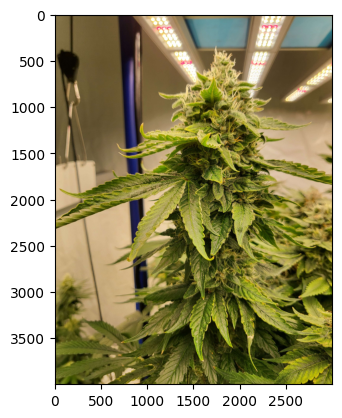

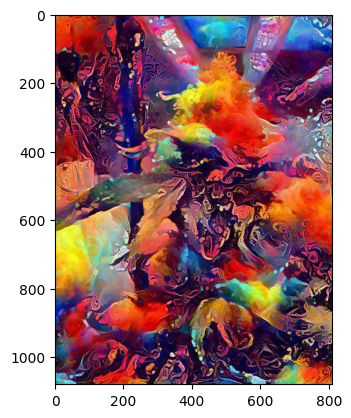

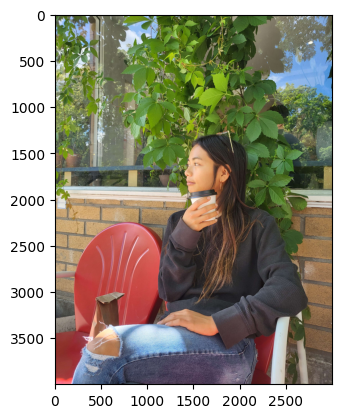

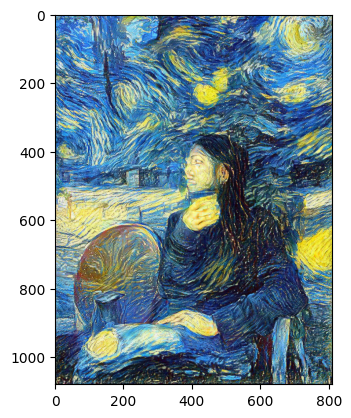

In [3]:

img3_og = load_image(img_path='img3_og.png', imshow=True)

img3_out = load_image(img_path='img3_out.png', imshow=True)


img4_og = load_image(img_path='img4_og.png', imshow=True)

img4_out = load_image(img_path='img4_out.png', imshow=True)


## Image 5 & Image 6: Recolorization

## Descrption
The technique applied to the following 2 images is Recolorization. The idea of the method is to color to black and white images. This is usually done to old photos without colored photography. Details or the essence of the photos are often lost in black and white images. Something about colors really allows us to relate to a scene as if it were taken recently. The specific implementation of recoloration is done through a deep learning technique known as Self-Attention Generative Adversarial Networks [3].

### Image 5
**Camera:** Samsung SM-F711W, 12MP F1.8 26mm 1/194

A portait of a boy and a photo of his great grandfather who he has never met. Upon stumbling on the old photo, he realized how similar in style they both were. This image is recolorized to show what the old photo might look like if it was taken with a color camera. The similarity is chilling. Slight changes in the background color is observed. In morocco the fez hat is typically red, so the network is able to accurately recreate the color image.


### Image 6
**Camera:** Samsung SM-F711W, 12MP F1.8 26mm 1/30s

A modern photo of a women in a peaky blinders costume, made black and white for stylistic reasons. This image is recolorized fairly accurately. Notice that the cigarette color is inaccurately shown as red.

### References

[3] Zhang, H., Goodfellow, I., Metaxas, D., & Odena, A. (2019, May). Self-attention generative adversarial networks. In International conference on machine learning (pp. 7354-7363). PMLR.


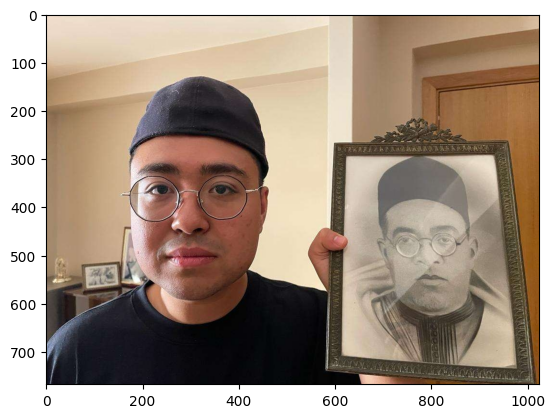

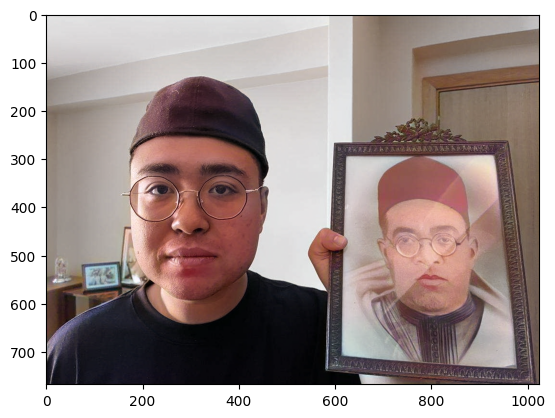

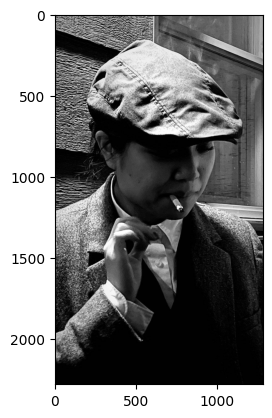

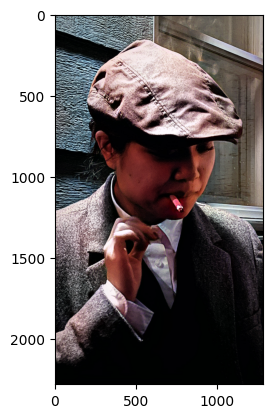

In [4]:

img5_og = load_image(img_path='img5_og.png', imshow=True)

img5_out = load_image(img_path='img5_out.png', imshow=True)


img6_og = load_image(img_path='img6_og.png', imshow=True)

img6_out = load_image(img_path='img6_out.png', imshow=True)


## Image 7 & Image 8: Deblurring

## Descrption
The technique applied to the following 2 images is Deblurring. The idea of the method is to determine a blurring kernal that will result in an image that is restored to it original unblurred state. This is usually done to photo blurs resulted by motion or by focus. The approach selected for deblurring is Nonlinear Activation Free Network for Image Restoration (NAFnet)[4].

### Image 7
**Camera:** Samsung SM-F711W, 12MP F1.8 26mm 1/50

A stylistically blurred image resulting from the subject being outside the range of focus. The deblurring method is applied to achieve a realistic interpretation of a focused scene. While far from perfect, still able to capture details such as shirt pattern and logo on soap bottle.

### Image 8
**Camera:** Samsung SM-F711W, 10MP F2.4 25mm 1/15s

A couple who wishes to get a better picture of a selfie. Deblurring is able to capture some more detail, however the results are far from perfect


### References

[4] Chen, L., Chu, X., Zhang, X., & Sun, J. (2022, November). Simple baselines for image restoration. In Computer Vision–ECCV 2022: 17th European Conference, Tel Aviv, Israel, October 23–27, 2022, Proceedings, Part VII (pp. 17-33). Cham: Springer Nature Switzerland.


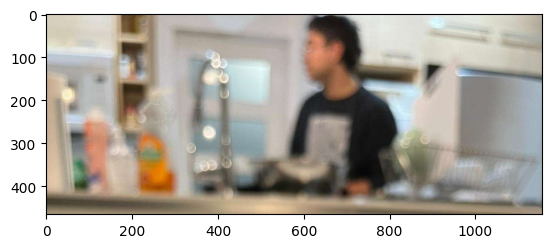

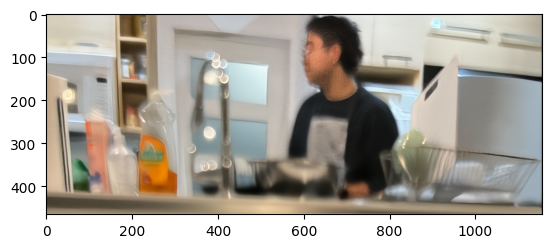

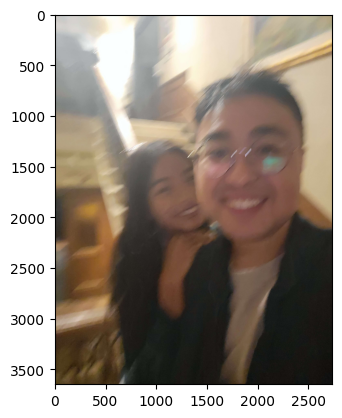

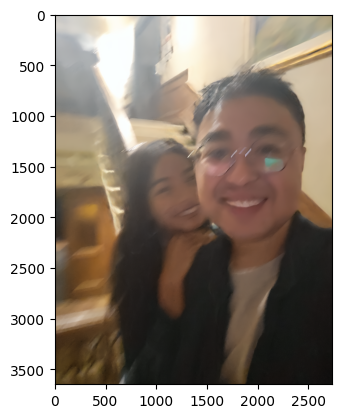

In [5]:

img7_og = load_image(img_path='img7_og.png', imshow=True)

img7_out = load_image(img_path='img7_out.png', imshow=True)


img8_og = load_image(img_path='img8_og.png', imshow=True)

img8_out = load_image(img_path='img8_out.png', imshow=True)


## Image 9 & Image 10: Super resolution

## Descrption
The technique applied to the following 2 images is Super Resolution. The idea of the method is to to enhance the resolution of low resolution images. This technique is often applied to images scaled down, that are scaled back up to reproduce the original image quality. The specific implementation applied to these images is a General Adversarial Network approach known as Real-ESRGAN[5]

### Image 9
**Camera:** Samsung SM-F711W, 12MP F1.8 26mm 1/20

An old family photo retaken by a samsung smart phone camera. The resulting image is low quality, thus super resolution is applied to enhance the image. While the quality of detail is quite impressive and high, the resulting details are not accurate to the features of the represented person. This results in unsettling output images. Another thing to notice is that occluded details are reproduced on occluding object. In this case  eyes are reproduced on the arm of the young boy covering his original eyes. This can be seen in more detail in the original image file accomanying this document.

### Image 10
**Camera:** Samsung SM-F711W, 10MP F2.4 25mm 1/722s

Zoomed in photo of siblings taken from quite a distance. Once again, new details produced of the people are unsettling and not at all representative of the subjects. However, details of the surrounding are much nicer and sharp. This can be seen in more detail in the original image file accomanying this document.

### References

[5] Wang, X., Xie, L., Dong, C., & Shan, Y. (2021). Real-esrgan: Training real-world blind super-resolution with pure synthetic data. In Proceedings of the IEEE/CVF International Conference on Computer Vision (pp. 1905-1914).


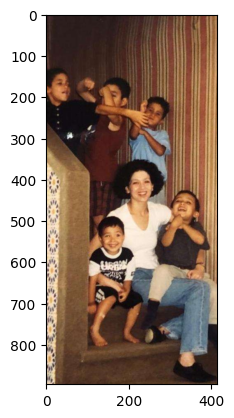

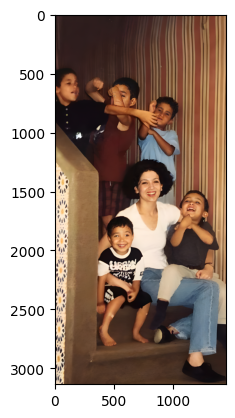

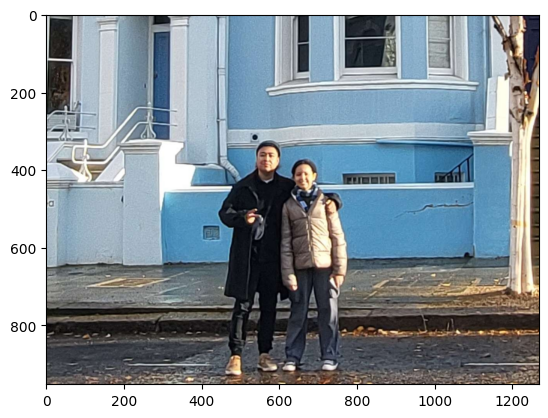

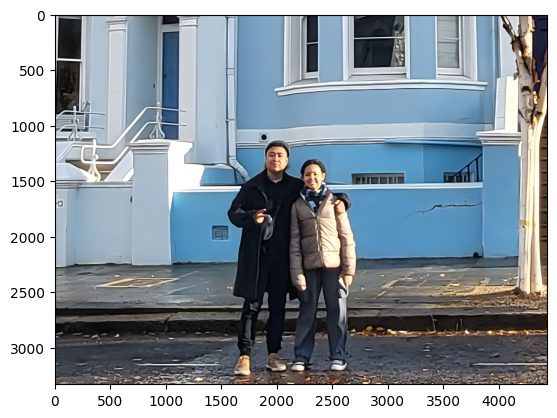

In [6]:

img9_og = load_image(img_path='img9_og.png', imshow=True)

img9_out = load_image(img_path='img9_out.png', imshow=True)


img10_og = load_image(img_path='img10_og.png', imshow=True)

img10_out = load_image(img_path='img10_out.png', imshow=True)
